<a href="https://colab.research.google.com/github/neilkazimierzsheridan/data_science_course/blob/main/ds_LinearRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression (One Feature)

Ordinary least squares works by minimizing sum of the squares of the differences between the observed DV in the dataset, and those predicted by the linear function

In [ ]:
#OLS



Equation of a line:

$${y}= {m}{x}+{b}$$

Where $${m}$$ is the slope of the line
and $${b}$$ is where line crosses y-axis when $${x}=0$$


$ $
$$\hat{y}=\displaystyle\sum_{i=0}^{n}\beta{i}\space{x}{i}$$
$ $

Line equation generalised for multiple features.  The hat symbol for a prediction.  For some x there is a beta coefficient to multiple it by, in order to get some fit to reduce error.

In linear regression, this equation of a line $${y}= {m}{x}+{b}$$ becomes:
$$\hat{y}={b}_0+b_1{x}$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files #get csv
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#Is there a relationship between advert spend and sales?
#We need to combine them since we are only working with one feature
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


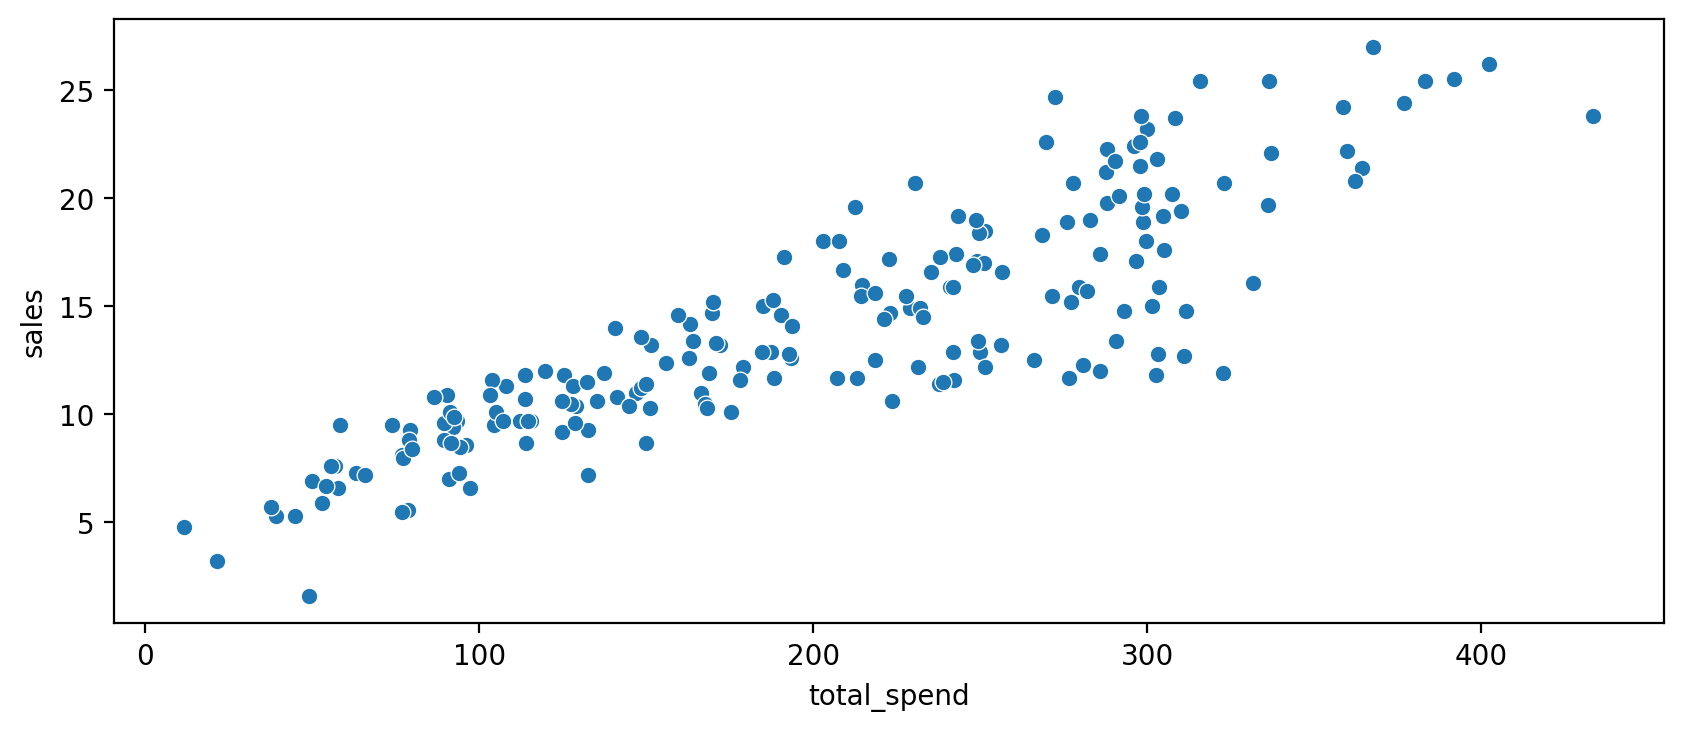

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='total_spend', y='sales')

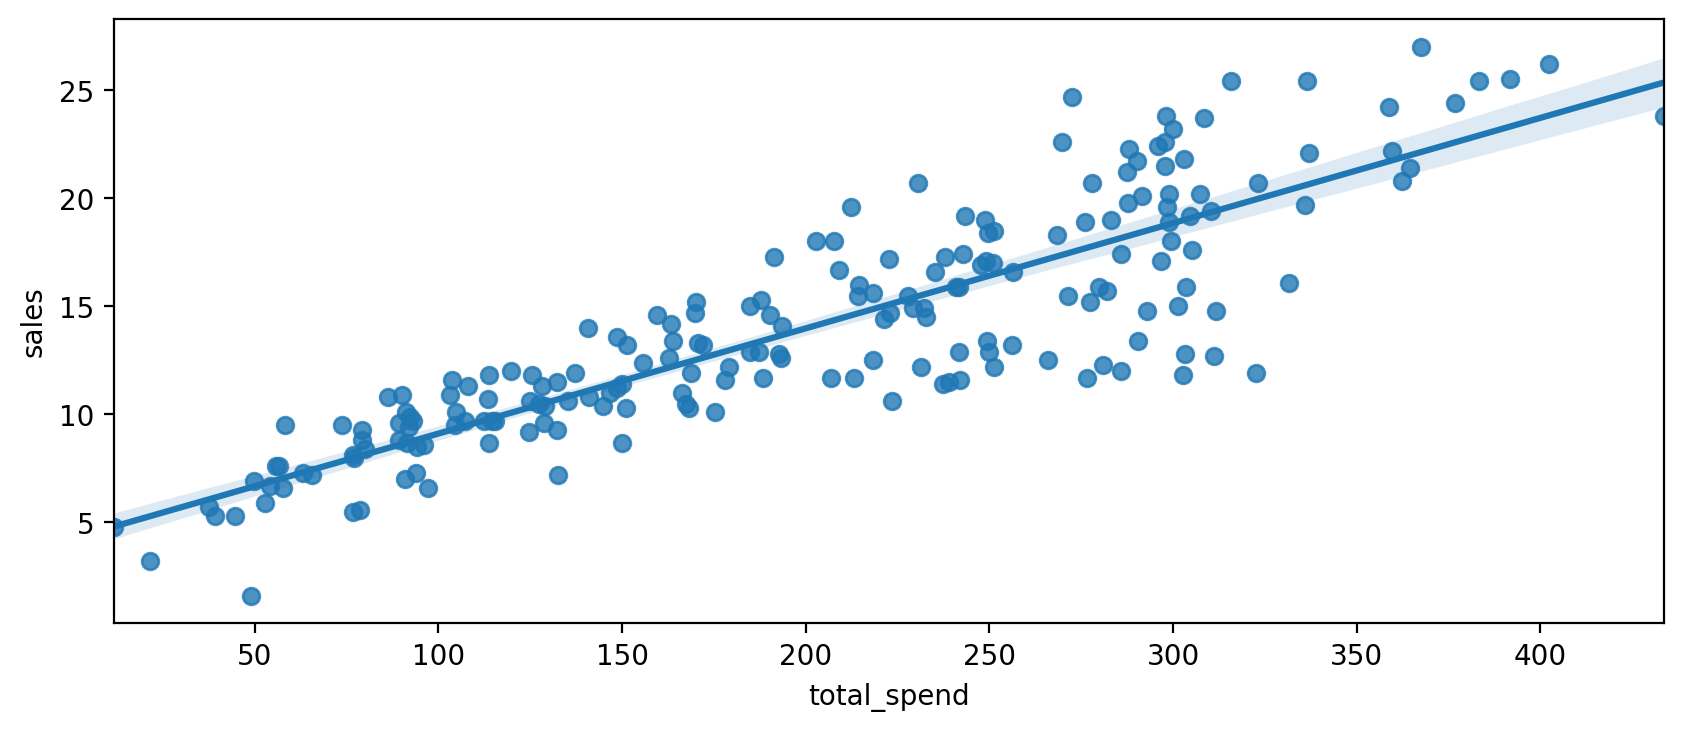

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.regplot(data=df, x='total_spend', y='sales') #special regression plot with y=mx+b line

In [ ]:
X = df['total_spend']
y = df['sales']
#Now we can solve OLS with np.polyfit

In [ ]:
# y = mX+b
# y = B1x + B0
np.polyfit(X,y,deg=1)
#so we get back beta coefficents B1 and B0

array([0.04868788, 4.24302822])

In [ ]:
#Now we can predict the y for any X
potential_spend = np.linspace(0,500,100)

In [ ]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822


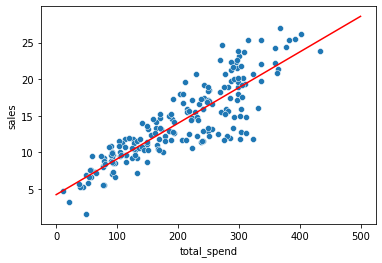

In [ ]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
#Here it is on top of the real data points

In [ ]:
spend = 200
#what would be predicted sales then?
predicted_sales = 0.04868788 * spend + 4.24302822

In [ ]:
predicted_sales

13.98060422

Having a play with some football data!

In [5]:
url = 'https://raw.githubusercontent.com/mckayjohns/linearregression/main/1995_96%20-%202020%20Premier%20league%20standings.csv'

In [6]:
df = pd.read_csv(url)

In [7]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996


In [8]:
#So the X is going to be GF-GA (goals for - goals against)
#so the goal differential called GD
# and the y is going to be rank (Rk)
df['GD'] = df['GF'] - df['GA']

In [9]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17


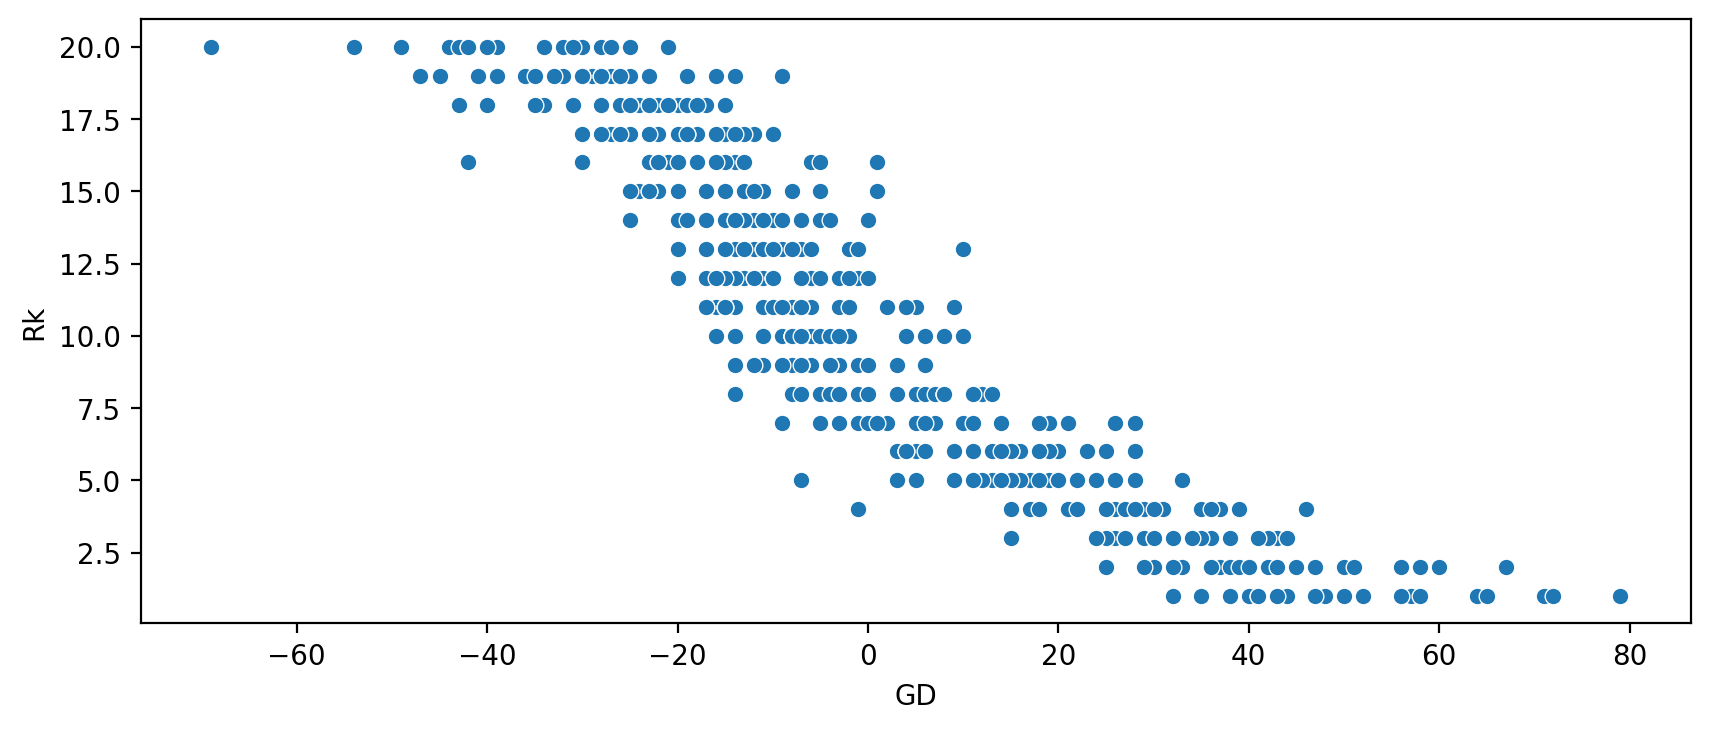

In [10]:
#lets see a plot to find out if there is a relationship between our X of GD, and y
#of Rank!
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='GD', y='Rk')

In [ ]:
#So yeah, as GD decreases, the rank increases

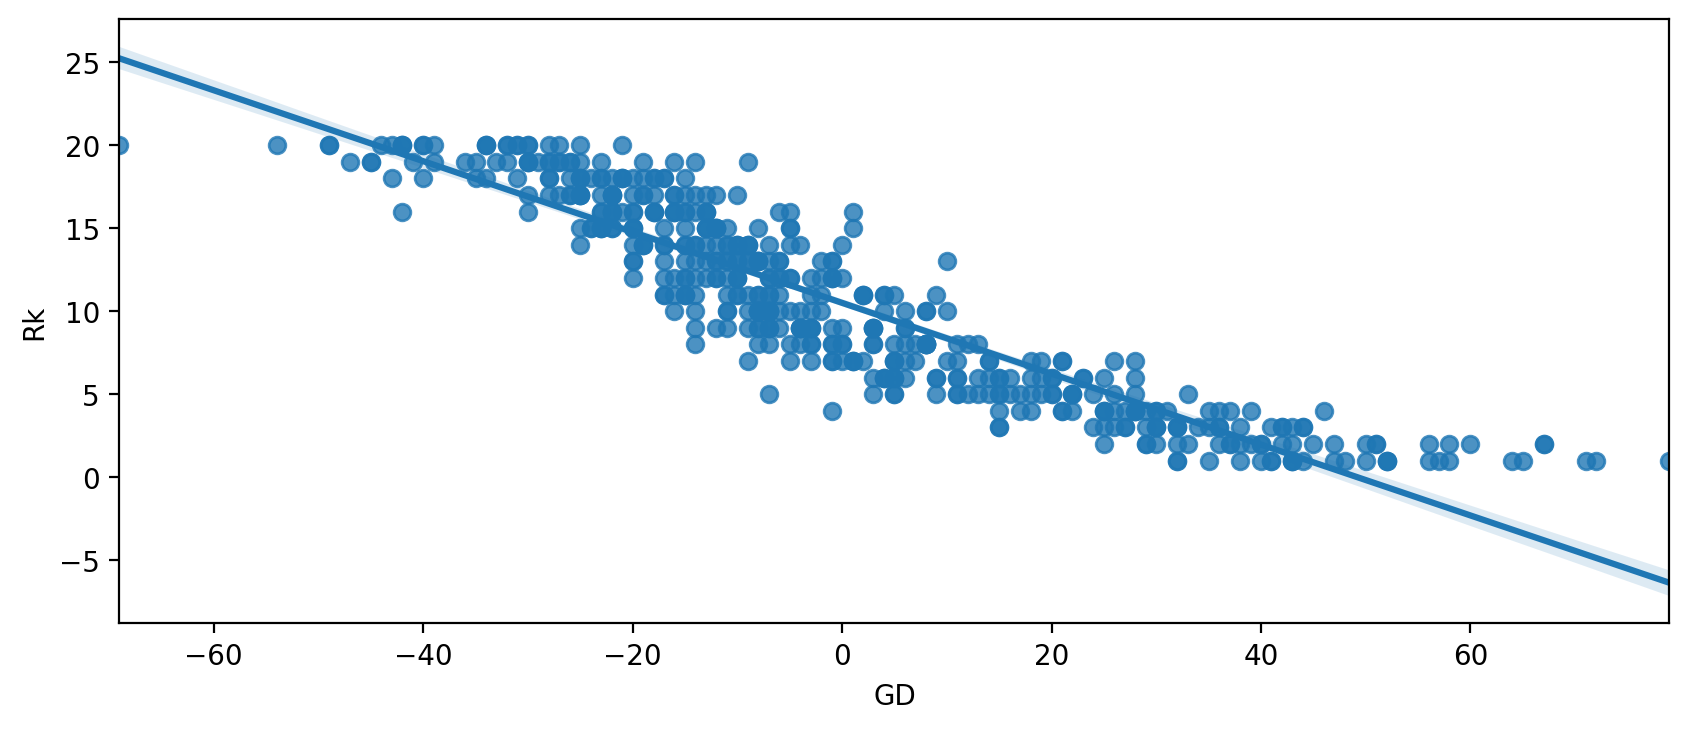

In [11]:
plt.figure(figsize=(10,4), dpi=200)
sns.regplot(data=df, x='GD', y='Rk') #special regression plot with y=mx+b line

In [12]:
X = df['GD']
y = df['Rk']
#Now we can solve OLS with np.polyfit

In [13]:
np.polyfit(X,y,deg=1)
#so we get back beta coefficents B1 and B0

array([-0.21341188, 10.5       ])

In [14]:
#Now we can predict the y for any X
potential_GD = np.linspace(-60,100,10)

In [15]:
predicted_Rank = -0.21341188 * potential_GD + 10.5 

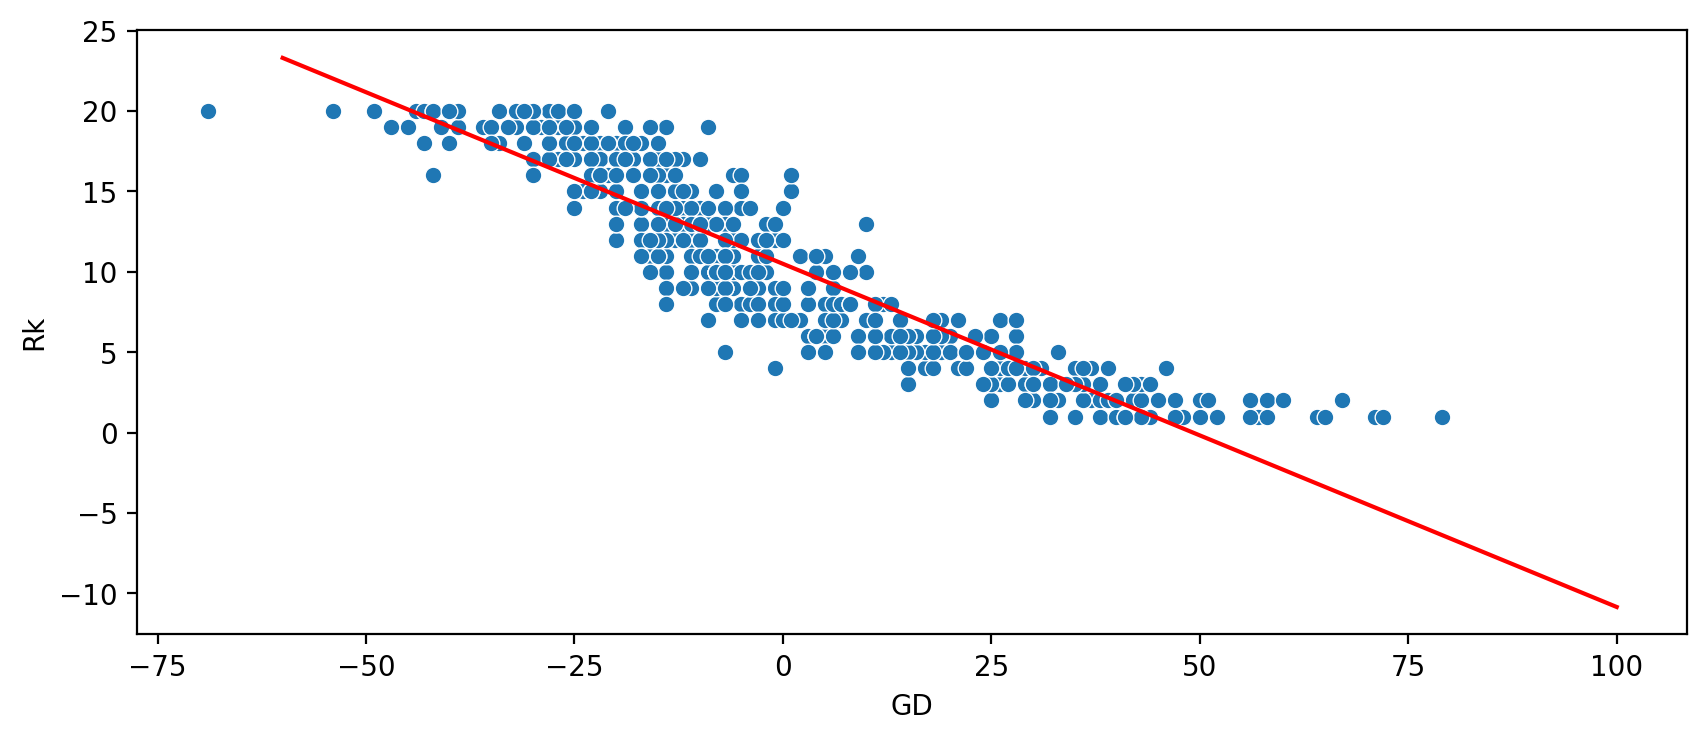

In [17]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(x='GD', y='Rk', data=df)
plt.plot(potential_GD, predicted_Rank, color='red')
#Here it is on top of the real data points